In [1]:
import tensorflow as tf
from tensorflow.keras import datasetssets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [28]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [29]:
X_train.shape

(50000, 32, 32, 3)

In [30]:
X_test.shape

(10000, 32, 32, 3)

In [31]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [32]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [33]:
classes = ["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [34]:
classes[9]

'truck'

In [35]:
def plot_sample(X,y,index):
    plt.figure(figsize =(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

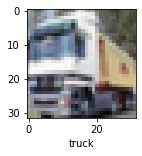

In [36]:
plot_sample(X_train,y_train,1)

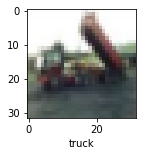

In [37]:
plot_sample(X_train,y_train,2)

In [38]:
X_train =X_train/255
X_test =X_test/255

In [39]:
X_train.shape

(50000, 32, 32, 3)

In [40]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

In [41]:
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 87s 52ms/step - loss: 1.8157 - accuracy: 0.3516
Epoch 2/5
1563/1563 [==============================] - 82s 53ms/step - loss: 1.6274 - accuracy: 0.4260
Epoch 3/5
1563/1563 [==============================] - 81s 52ms/step - loss: 1.5440 - accuracy: 0.4571
Epoch 4/5
1563/1563 [==============================] - 82s 52ms/step - loss: 1.4815 - accuracy: 0.4798
Epoch 5/5
1563/1563 [==============================] - 80s 51ms/step - loss: 1.4342 - accuracy: 0.4948


In [42]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.4862 - accuracy: 0.4786


[1.4861706495285034, 0.47859999537467957]

In [43]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.52      0.55      1000
           1       0.73      0.48      0.58      1000
           2       0.37      0.35      0.36      1000
           3       0.33      0.31      0.32      1000
           4       0.42      0.40      0.41      1000
           5       0.30      0.56      0.39      1000
           6       0.56      0.47      0.51      1000
           7       0.54      0.57      0.55      1000
           8       0.62      0.59      0.60      1000
           9       0.58      0.54      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.48     10000
weighted avg       0.50      0.48      0.48     10000



In [45]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size = (3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=32,kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation='softmax')
    
])

In [47]:
cnn.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 34s 21ms/step - loss: 1.4870 - accuracy: 0.4647
Epoch 2/5
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1549 - accuracy: 0.5936
Epoch 3/5
1563/1563 [==============================] - 26s 16ms/step - loss: 1.0341 - accuracy: 0.6392
Epoch 4/5
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9535 - accuracy: 0.6673
Epoch 5/5
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8958 - accuracy: 0.6863


In [49]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9749 - accuracy: 0.6617


[0.9749354720115662, 0.6617000102996826]

In [50]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [51]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

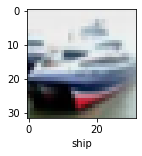

In [52]:
plot_sample(X_test,y_test,1)

In [53]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.56721231e-02, 1.02038682e-03, 5.84686622e-02, 3.33779037e-01,
        2.79053207e-03, 1.04278140e-01, 1.65751219e-01, 8.30177218e-04,
        3.12671185e-01, 4.73863911e-03],
       [1.81066226e-02, 1.17170289e-01, 6.55253189e-06, 1.40115408e-05,
        9.95367100e-06, 2.52117331e-07, 1.02592473e-07, 5.45146520e-07,
        8.63765121e-01, 9.26507462e-04],
       [2.70301737e-02, 1.21848278e-01, 7.59292801e-04, 1.67315523e-03,
        2.71990837e-04, 1.45941536e-04, 5.27857410e-05, 1.93949440e-04,
        8.41388822e-01, 6.63550012e-03],
       [7.52771556e-01, 2.68741865e-02, 3.21360352e-03, 1.91444636e-03,
        2.16614716e-02, 9.04594708e-05, 1.11576162e-04, 3.90438683e-04,
        1.92894742e-01, 7.74833024e-05],
       [3.78814468e-04, 1.30161803e-04, 1.49068385e-01, 3.20312530e-02,
        4.48658437e-01, 1.13390563e-02, 3.57600123e-01, 1.20772565e-04,
        6.17148064e-04, 5.58437896e-05]], dtype=float32)

In [56]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [57]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [58]:
classes

['aeroplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

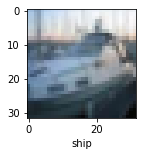

In [63]:
plot_sample(X_test,y_test,3)

In [65]:
classes[y_classes[3]]

'aeroplane'

In [66]:
print("Classification Report: \n", classification_report(y_test,y_classes)) 

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.63      0.68      1000
           1       0.72      0.82      0.77      1000
           2       0.51      0.62      0.56      1000
           3       0.50      0.48      0.49      1000
           4       0.59      0.64      0.61      1000
           5       0.65      0.48      0.55      1000
           6       0.77      0.73      0.75      1000
           7       0.76      0.68      0.72      1000
           8       0.65      0.87      0.74      1000
           9       0.79      0.67      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

